In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [97]:
dat = pd.read_csv('sim_data_for_tsne.csv', usecols=range(8)[1:])

In [80]:
manifold = TSNE(random_state = 237, method = 'exact')

dims = ['X1', 'X2', 'X3', 'X4', 'X5']

coords_all = manifold.fit_transform(dat[dims])
coords_puffs = manifold.fit_transform(dat.loc[dat['group'] != 'nonpuff', dims])

In [81]:
manifold = TSNE(random_state = 237, method = 'exact')

coords_weighted = manifold.fit_transform(dat[dims], weights = dat['weight'])

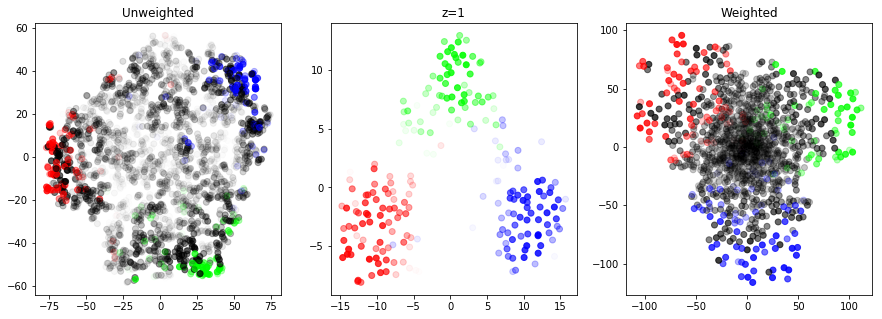

In [96]:
color_dict = {'nonpuff' : [0, 0, 0], 'puff1' : [1, 0, 0], 'puff2' : [0, 1, 0], 'puff3' : [0, 0, 1]}
colors_ = np.array([color_dict[el.group] + [el.weight] for el in dat[['group', 'weight']].itertuples()])

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].scatter(coords_all[:,0], coords_all[:,1], 
               color = colors_)
axs[0].set_title('Unweighted')
axs[1].scatter(coords_puffs[:,0], coords_puffs[:,1], 
               color = colors_[dat['group'] != 'nonpuff', :])
axs[1].set_title('z=1')
axs[2].scatter(coords_weighted[:,0], coords_weighted[:,1], 
               color = colors_)
axs[2].set_title('Weighted')
plt.show()